<AxesSubplot: >

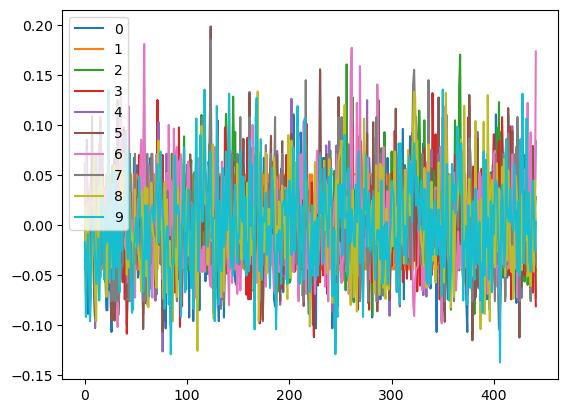

In [7]:
#load data
from sklearn.datasets import load_diabetes
data = load_diabetes()
X_ = data.data
y = data['target']
##print(data.keys())
#print(data['DESCR'])

import pandas as pd
frame = pd.DataFrame(X_)
frame.plot()


In [8]:
import numpy as np
print(X_.shape[0],X_.shape[1])
n_samples = X_.shape[0]
n_features = X_.shape[1]+1
dummy= np.ones((n_samples,1))
X = np.concatenate((dummy,X_), axis=1)
w = np.random.randn(n_features)
print(w.shape)

eta = 0.01
step =0
error = 1e-7
max_steps = 1000
alpha = 0.1
while True and step < max_steps:
    g = 1/n_samples * X.T@(X@w-y) + 2*w*alpha
    w_new = w - eta*g
    step +=1
    if abs(w_new-w).sum() < error:
        break
    w= w_new
print(w)
print(step)   

442 10
(11,)
[126.77717698   2.90217305   0.67983967   9.12172289   6.80237068
   2.89501554   2.50023896  -6.00028922   6.68035003   8.90242581
   5.88485832]
1000


In [22]:
w_a = np.linalg.inv(X.T@X)@X.T@y
w_a

array([ 152.13348416,  -10.0098663 , -239.81564367,  519.84592005,
        324.3846455 , -792.17563855,  476.73902101,  101.04326794,
        177.06323767,  751.27369956,   67.62669218])

In [17]:
from sklearn.datasets import load_diabetes
import numpy as np

# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Add intercept term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize weights and other hyperparameters
w = np.zeros(X.shape[1])
alpha = 0.01
lam = 0.1
max_iter = 1000
tol = 1e-6

# Run gradient descent with L1 regularization
for i in range(max_iter):
    # Compute predicted outputs and errors
    y_pred = X @ w
    errors = y_pred - y
    
    # Compute L1 regularization term for gradient
    reg_term = lam * np.sign(w)
    
    # Compute gradient and update weights
    grad = (X.T @ errors + reg_term) / X.shape[0]
    w = w - alpha * grad
    
    # Check convergence
    if np.abs(grad).max() < tol:
        break

print("Final weights: ", w)
print("Number of iterations: ", i+1)


Final weights:  [152.12669014   6.50609568   1.28587563  20.8243985   15.6110959
   7.24292321   5.85338399 -13.89861162  15.01377422  19.99098729
  13.39685383]
Number of iterations:  1000
